Definir:
1 - Evolução quantitativa de clientes ativos por mês
2 - Classificar os clientes por volume e frequencia de compra.
3 - O que cada cliente compra e com que frequência.
4 - Evolução dos produtos Oferecidos
5 - Classificar produtos por tipo.Varios produtos identicos com códigos diferentes em função da embalagem
6 - Análise geográfica x volume x produto

In [1]:
import pandas as pd
import numpy as np
import locale
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Define Moeda Brasileira numeros R$ 1.000,00
locale.setlocale( locale.LC_ALL, '' )
#locale.currency( g, grouping = True )

'Portuguese_Brazil.1252'

In [2]:
#locale.currency( g, grouping = True )

In [3]:
from numpy.random import randn
#np.random.seed(101)

In [4]:
#pd.options.display.float_format = 'R${:,.2f}'.format

In [5]:
# Abre o dataset
df = pd.read_csv('NFe-SupraAlimentos.csv')


In [6]:
df.head()

,cliente,NF,data,CNPJ,cidade,bairro,UF,cod,descricao,QTY,unidade,preco
0,NF-E EMITIDA EM AMBIENTE DE HOMOLOGACAO - SEM ...,4,2014-08-29,27833615002018,RIO DE JANEIRO,CASIMIRO DE ABREU,RJ,20002,ALHO CEBOLA PICADINHO S/SAL 180GR,1,UN,2.77
1,NF-E EMITIDA EM AMBIENTE DE HOMOLOGACAO - SEM ...,5,2014-08-29,9309021000168,RIO DE JANEIRO,VILA NOVA DE CAMPOS,RJ,10002,ALECRIM 15GR,1,UN,1.11
2,NF-E EMITIDA EM AMBIENTE DE HOMOLOGACAO - SEM ...,6,2014-08-29,9309021000168,ANGRA DOS REIS,VILA NOVA DE CAMPOS,RJ,10001,ACAFRAO 15GR,12,UN,9.72
3,NF-E EMITIDA EM AMBIENTE DE HOMOLOGACAO - SEM ...,6,2014-08-29,9309021000168,ANGRA DOS REIS,VILA NOVA DE CAMPOS,RJ,10002,ALECRIM 15GR,1,UN,1.11
4,NF-E EMITIDA EM AMBIENTE DE HOMOLOGACAO - SEM ...,6,2014-08-29,9309021000168,ANGRA DOS REIS,VILA NOVA DE CAMPOS,RJ,10009,CALDO DE CARNE COM ERVAS FINAS 60GR,1,UN,1.43


#### Faturamento Total


In [7]:
#g = float("{0:.2f}".format(df['preco'].sum())) 
#FaturamentoTotal = locale.currency( g, grouping = True ) 
FaturamentoTotal=df['preco'].sum()
#faturamento=df['preco'].sum()


In [8]:
FaturamentoTotal

11677734.969999999

#### Total de NF Emitidas no Período

In [9]:
NotasFiscais = df['NF']

In [10]:
NotasFiscais = NotasFiscais.drop_duplicates()

In [11]:
TotalNFEmitidas = len(NotasFiscais)

In [12]:
TotalNFEmitidas 

6627

#### Vendas Mensais

In [13]:
Vendas = df[['data','preco']].groupby(df['data'].str[0:7]).sum().reset_index()

In [14]:
Vendas.head()

,data,preco
0,2014-08,25.15
1,2014-09,30659.84
2,2014-10,166108.11
3,2014-11,202230.11
4,2014-12,261422.34


#### Vendas por Ano

In [15]:
V18 = Vendas[(Vendas['data'].str[0:4]=='2018')].reset_index(drop=True)

In [16]:
V17 = Vendas[(Vendas['data'].str[0:4]=='2017')].reset_index(drop=True)

In [17]:
V16 = Vendas[(Vendas['data'].str[0:4]=='2016')].reset_index(drop=True)

In [18]:
V15 = Vendas[(Vendas['data'].str[0:4]=='2015')].reset_index(drop=True)

In [19]:
V14 = Vendas[(Vendas['data'].str[0:4]=='2014')].reset_index(drop=True)


In [20]:
V14 = V14.append({'data':'2014-01','preco':0}, ignore_index=True)
V14 = V14.append({'data':'2014-02','preco':0}, ignore_index=True)
V14 = V14.append({'data':'2014-03','preco':0}, ignore_index=True)
V14 = V14.append({'data':'2014-04','preco':0}, ignore_index=True)
V14 = V14.append({'data':'2014-05','preco':0}, ignore_index=True)
V14 = V14.append({'data':'2014-06','preco':0}, ignore_index=True)
V14 = V14.append({'data':'2014-07','preco':0}, ignore_index=True)



In [21]:
V14 = V14.sort_values(by=['data']).reset_index(drop=True)

In [22]:
V14.tail()

,data,preco
7,2014-08,25.15
8,2014-09,30659.84
9,2014-10,166108.11
10,2014-11,202230.11
11,2014-12,261422.34


In [23]:
sales = [('Mês',['Jan','Fev','Mar','Abr','Mai','Jun','Jul','Ago','Set','Out','Nov','Dez']),
         ('2014',V14['preco']),
         ('2015',V15['preco']),
         ('2016',V16['preco']),
         ('2017',V17['preco']),
         ('2018',V18['preco']),]

In [24]:
sales_DF = pd.DataFrame.from_items(sales)

In [25]:
sales_DF

,Mês,2014,2015,2016,2017,2018
0,Jan,0.00,167359.14,215603.05,223066.16,440912.50
1,Fev,0.00,187427.98,230846.22,419094.69,243182.04
2,Mar,0.00,232049.37,283184.44,367971.45,NaN
3,Abr,0.00,122549.58,266678.23,330764.78,NaN
4,Mai,0.00,158585.94,198344.71,408940.00,NaN
5,Jun,0.00,161137.81,256762.57,360857.82,NaN
6,Jul,0.00,225357.45,207020.66,354151.95,NaN
7,Ago,25.15,171335.69,297127.17,354449.32,NaN
8,Set,30659.84,210564.28,326441.15,359574.77,NaN
9,Out,166108.11,218276.49,260436.19,340063.38,NaN


#### Cria Arquivo CSV

In [26]:
sales_DF.to_csv('C:/Mettricx/Projetos/SupraAlimentos/PowerBI/Supra_Vendas_Anuais.csv', encoding='utf-8', index=False,  float_format='%.2f')

# Total de compras por Cliente

In [27]:
compraDeClientes = df.groupby('CNPJ')['preco'].sum().reset_index()

In [28]:
compraDeClientes.head()

,CNPJ,preco
0,175479000105,14429.17
1,334392000206,1511.64
2,381613000116,6249.46
3,803210000118,11911.61
4,814123000166,9583.20


In [29]:
compras = compraDeClientes.sort_values(by=['preco'],ascending=False, na_position='first').reset_index(drop=True)

In [30]:
compras.head()

,CNPJ,preco
0,12360891000176,474946.97
1,15116388000168,367559.08
2,12434859000198,362693.84
3,29840154000173,300708.01
4,19068286000175,287622.97


#### Definie volume de compras por Cliente (Participação no Volume Total)

In [31]:
compras['percenTotal']=((compras['preco']/FaturamentoTotal)*100).round(3)

In [32]:
compras.head()

,CNPJ,preco,percenTotal
0,12360891000176,474946.97,4.067
1,15116388000168,367559.08,3.148
2,12434859000198,362693.84,3.106
3,29840154000173,300708.01,2.575
4,19068286000175,287622.97,2.463


#### Valor de cada NF emitida

In [33]:
a = df.groupby('NF').size().reset_index(name='Qty')

In [34]:
ValorNF = df.groupby('NF')["preco"].sum().rename("Total_NF").reset_index()

In [35]:
ValorNF.head()

,NF,Total_NF
0,4,2.77
1,5,1.11
2,6,15.24
3,7,1.39
4,8,1.39


#### Quantidade de Compras (Notas Emitidas por Cliente)

In [89]:
df1 = df[['CNPJ','NF']]  

In [90]:
df1 = df1.drop_duplicates()

In [92]:
df1.head()

,CNPJ,NF
0,27833615002018,4
1,9309021000168,5
2,9309021000168,6
7,9309021000168,7
8,9309021000168,8


In [94]:
qtyDeCompras = df1.groupby('CNPJ').agg({'NF': "count"}).reset_index()    # get the first date per group

In [95]:
qtyDeCompras.head(10)

,CNPJ,NF
0,175479000105,16
1,334392000206,2
2,381613000116,8
3,803210000118,10
4,814123000166,4
5,834279000109,15
6,834279000290,14
7,1006952000185,21
8,1015564000160,9
9,1023162000108,3


In [96]:
a=qtyDeCompras['NF'].sum()
a

6627

In [98]:
qtyDeCompras = qtyDeCompras.sort_values(by=['NF'],ascending=False, na_position='first').reset_index(drop=True)

In [99]:
qtyDeCompras.head()

,CNPJ,NF
0,17339293000139,142
1,12434859000198,136
2,22536813000133,115
3,29840154000173,72
4,19068286000175,69


In [101]:
qtyDeCompras['frequencia']=((qtyDeCompras['NF']/TotalNFEmitidas)*100).round(3)

In [102]:
qtyDeCompras = qtyDeCompras.sort_values(by=['frequencia'],ascending=False, na_position='first').reset_index(drop=True)

In [104]:
qtyDeCompras.head()

,CNPJ,NF,frequencia
0,17339293000139,142,2.143
1,12434859000198,136,2.052
2,22536813000133,115,1.735
3,29840154000173,72,1.086
4,19068286000175,69,1.041


In [105]:
# Convertendo de Série p/ dataframe
#yCompras = qtyDeCompras.to_frame().reset_index()

In [106]:
# Faz o MERGE dos dois Datasets
s1 = pd.merge(compras, qtyDeCompras, how='inner', on=['CNPJ'])

In [107]:
s1.head()

,CNPJ,preco,percenTotal,NF,frequencia
0,12360891000176,474946.97,4.067,26,0.392
1,15116388000168,367559.08,3.148,23,0.347
2,12434859000198,362693.84,3.106,136,2.052
3,29840154000173,300708.01,2.575,72,1.086
4,19068286000175,287622.97,2.463,69,1.041


In [113]:
s1.rename(columns={'preco': 'VolCompras', 'percenTotal': 'percentual', 'NF': 'QtyCompras'}, inplace=True)

In [114]:
#pd.options.display.float_format = '${:,.2f}'.format

In [115]:
s1

,CNPJ,VolCompras,percentual,QtyCompras,frequencia
0,12360891000176,"$474,946.97",$4.07,26,$0.39
1,15116388000168,"$367,559.08",$3.15,23,$0.35
2,12434859000198,"$362,693.84",$3.11,136,$2.05
3,29840154000173,"$300,708.01",$2.58,72,$1.09
4,19068286000175,"$287,622.97",$2.46,69,$1.04
5,17339293000139,"$216,302.26",$1.85,142,$2.14
6,39508023000228,"$179,723.79",$1.54,54,$0.81
7,27833615001984,"$160,547.14",$1.38,48,$0.72
8,5565335000170,"$153,918.48",$1.32,67,$1.01
9,9653290000147,"$153,882.33",$1.32,47,$0.71


In [246]:
s1.drop(['Valor'], axis = 1, inplace = True) # , axis = 1, inplace = True

In [247]:
s1.drop(['NF'], axis = 1, inplace = True) # , axis = 1, inplace = True

In [73]:
s1 = s1.sort_values(by=['percenTotal'],ascending=False, na_position='first').reset_index(drop=True)

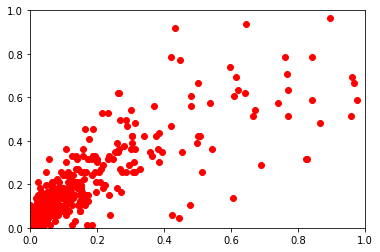

In [75]:
import matplotlib.pyplot as plt
plt.plot(s1.percenTotal, s1.frequencia, 'ro')
plt.axis([0, 1, 0, 1])

plt.show()

# Numero de Clientes comprando por Mês

In [ ]:
dados = df.groupby([df['data'].str[0:7],df['CNPJ']]).size()

In [ ]:
dados.head()

In [ ]:
# Convertendo de Série p/ dataframe
d = dados.to_frame().reset_index()


In [ ]:
# Número de Clientes por Mês
numClientes = d.groupby('data').size()
numClientes.head()

In [ ]:
# Número médio de Clientes
a=(numClientes.mean())

In [ ]:
int(a)

In [ ]:
numC = numClientes.plot( x=numClientes, stacked=True, kind='bar', figsize=(20,7), rot=90, legend=False, facecolor='#AA0000')

numC.set_xlabel('Mês')
numC.set_ylabel('Número de Clientes')
numC.set_title('Clientes Ativos')
numC.axhline( y=a, color='g', linestyle='--', lw=2, label='Valor Médio')